In [1]:
#!pip install xlrd==1.2.0 
!pip install --upgrade xlrd

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

список используемых ресурсов(для доработки проекта)
очистка датасета
https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27
scatter-matrix
https://www.kaggle.com/vijayprayagala/correlation-heat-map-and-scatter-matrix
регрессия
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9



In [3]:
# место для кода
xl = pd.ExcelFile('data1.xls')
xl.sheet_names
df = xl.parse("data2018")
df=df.replace(' ', np.nan)
#df[0:217]
df=df.dropna(how='all')
df

/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/2425100198.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(' ', np.nan)


,Country Name,Country Code,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,RESERVES,RATE,HCI
0,Afghanistan,AFG,1.194351e+08,8.333764e+10,1.840089,40.975606,8.260287,2.402431e+06,10334090.0,44.20343,8.206682e+09,NaN,0.393489
1,Albania,ALB,1.204383e+09,3.965339e+10,4.071301,45.263667,31.537380,2.641247e+07,1318022.0,66.99561,3.893560e+09,4.511767,0.628666
2,Algeria,DZA,1.466082e+09,4.962001e+11,1.400000,32.341022,25.623547,NaN,12173459.0,48.49803,8.738291e+10,0.412262,0.531994
3,American Samoa,ASM,NaN,NaN,2.184874,99.371069,68.867925,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,1.588765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,52142.0,NaN,NaN,NaN,NaN
213,West Bank and Gaza,PSE,2.106946e+08,2.647892e+10,0.905278,59.735630,19.865352,1.569027e+06,1214123.0,59.66608,5.378461e+08,5.970375,0.571729
214,"Yemen, Rep.",YEM,-2.820983e+08,NaN,0.752599,NaN,NaN,NaN,6545429.0,30.67289,NaN,NaN,0.372636
215,Zambia,ZMB,4.084385e+08,6.254688e+10,4.034812,35.983050,36.983166,3.500224e+07,7134980.0,65.71170,1.569230e+09,-0.407502,0.391176


In [4]:
df.shape

(217, 13)

### 2
Выведите описание прочтенных данных. 


In [5]:
# примитивные статистики
df.describe()

,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,RESERVES,RATE,HCI
count,2.000000e+02,1.890000e+02,197.000000,176.000000,176.000000,1.530000e+02,1.860000e+02,190.000000,1.720000e+02,110.000000,167.000000
mean,5.911103e+09,6.641860e+11,3.140527,49.628199,43.608597,2.763490e+09,1.835155e+07,62.129076,7.233670e+10,6.174123,0.565468
std,4.236105e+10,2.362386e+12,3.073618,27.418962,31.293741,9.462673e+09,6.977836e+07,13.822027,2.774065e+11,7.446652,0.146535
min,-3.614674e+11,4.656769e+07,-19.607843,12.345638,2.740391,0.000000e+00,3.983300e+04,20.041460,4.368355e+07,-8.520138,0.299029
25%,1.072306e+08,2.012045e+10,1.792864,31.092065,24.171182,5.333010e+06,1.052598e+06,53.469163,9.339920e+08,2.294005,0.442008
50%,6.367095e+08,8.333764e+10,3.149198,44.206517,36.267632,5.075662e+07,4.112413e+06,61.704655,5.716163e+09,5.206009,0.564260
75%,3.044935e+09,3.592990e+11,4.741606,60.898503,53.885885,9.128239e+08,1.245910e+07,73.175267,4.067165e+10,8.332279,0.683645
max,2.614820e+11,2.173068e+13,15.132800,188.573085,211.559049,8.548230e+10,7.834241e+08,87.004520,3.168216e+12,44.437544,0.887084


### 2 



In [6]:
# размерности
print(df.shape)

(217, 13)


In [7]:
print(df.dtypes)

Country Name     object
Country Code     object
FDI             float64
GDP_PPP         float64
GDP_GROWTH      float64
IMPORTS         float64
EXPORTS         float64
CHARGES         float64
LABOR_FORCE     float64
EDB             float64
RESERVES        float64
RATE            float64
HCI             float64
dtype: object


In [8]:
# отбор числовых столбцов
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols

array(['FDI', 'GDP_PPP', 'GDP_GROWTH', 'IMPORTS', 'EXPORTS', 'CHARGES',
       'LABOR_FORCE', 'EDB', 'RESERVES', 'RATE', 'HCI'], dtype=object)

In [9]:
# отбор нечисловых столбцов
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Country Name' 'Country Code']


<Axes: >

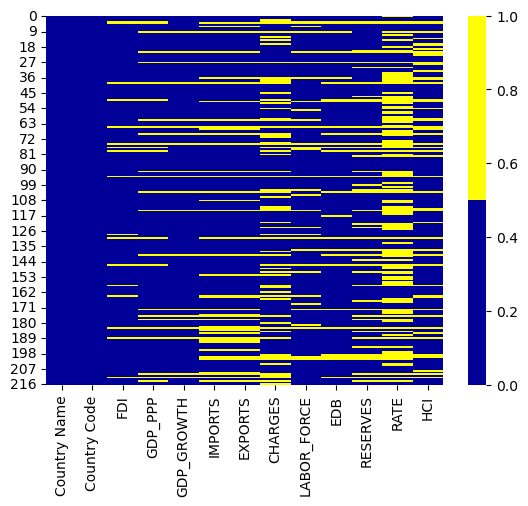

In [10]:
cols = df.columns[:13] # первые 13 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [11]:
#список долей отсутствующих записей для каждого признака
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Country Name - 0%
Country Code - 0%
FDI - 8%
GDP_PPP - 13%
GDP_GROWTH - 9%
IMPORTS - 19%
EXPORTS - 19%
CHARGES - 29%
LABOR_FORCE - 14%
EDB - 12%
RESERVES - 21%
RATE - 49%
HCI - 23%


Created missing indicator for: FDI
Created missing indicator for: GDP_PPP
Created missing indicator for: GDP_GROWTH
Created missing indicator for: IMPORTS
Created missing indicator for: EXPORTS
Created missing indicator for: CHARGES
Created missing indicator for: LABOR_FORCE
Created missing indicator for: EDB
Created missing indicator for: RESERVES
Created missing indicator for: RATE
Created missing indicator for: HCI


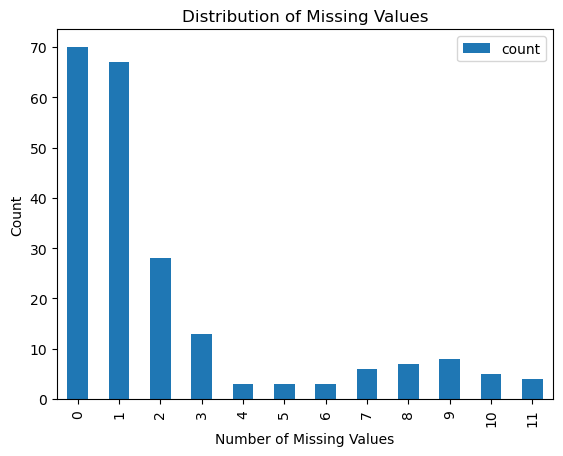

In [14]:
import matplotlib.pyplot as plt

# создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('Created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

missing_counts = df['num_missing'].value_counts().reset_index()
missing_counts.columns = ['num_missing', 'count']  # Rename the columns

missing_counts.sort_values(by='num_missing').plot.bar(x='num_missing', y='count')
plt.xlabel('Number of Missing Values')
plt.ylabel('Count')
plt.title('Distribution of Missing Values')
plt.show()


In [16]:
df

,Country Name,Country Code,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,...,GDP_GROWTH_ismissing,IMPORTS_ismissing,EXPORTS_ismissing,CHARGES_ismissing,LABOR_FORCE_ismissing,EDB_ismissing,RESERVES_ismissing,RATE_ismissing,HCI_ismissing,num_missing
0,Afghanistan,AFG,1.194351e+08,8.333764e+10,1.840089,40.975606,8.260287,2.402431e+06,10334090.0,44.20343,...,False,False,False,False,False,False,False,True,False,1
1,Albania,ALB,1.204383e+09,3.965339e+10,4.071301,45.263667,31.537380,2.641247e+07,1318022.0,66.99561,...,False,False,False,False,False,False,False,False,False,0
2,Algeria,DZA,1.466082e+09,4.962001e+11,1.400000,32.341022,25.623547,NaN,12173459.0,48.49803,...,False,False,False,True,False,False,False,False,False,1
3,American Samoa,ASM,NaN,NaN,2.184874,99.371069,68.867925,NaN,NaN,NaN,...,False,False,False,True,True,True,True,True,True,8
4,Andorra,AND,NaN,NaN,1.588765,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,52142.0,NaN,...,True,True,True,True,False,True,True,True,True,10
213,West Bank and Gaza,PSE,2.106946e+08,2.647892e+10,0.905278,59.735630,19.865352,1.569027e+06,1214123.0,59.66608,...,False,False,False,False,False,False,False,False,False,0
214,"Yemen, Rep.",YEM,-2.820983e+08,NaN,0.752599,NaN,NaN,NaN,6545429.0,30.67289,...,False,True,True,True,False,False,True,True,False,6
215,Zambia,ZMB,4.084385e+08,6.254688e+10,4.034812,35.983050,36.983166,3.500224e+07,7134980.0,65.71170,...,False,False,False,False,False,False,False,False,False,0


<Axes: >

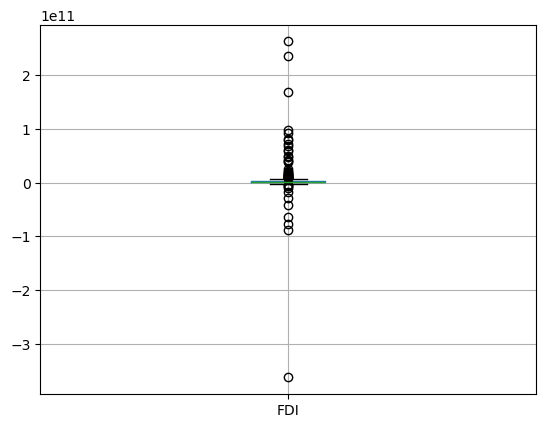

In [17]:
df.boxplot(column=['FDI'])

<Axes: >

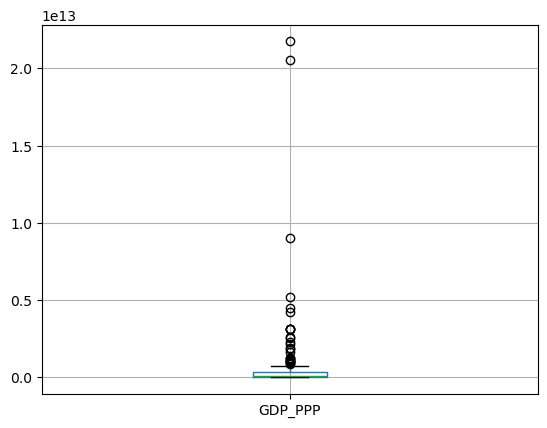

In [18]:
df.boxplot(column=['GDP_PPP'])

<Axes: >

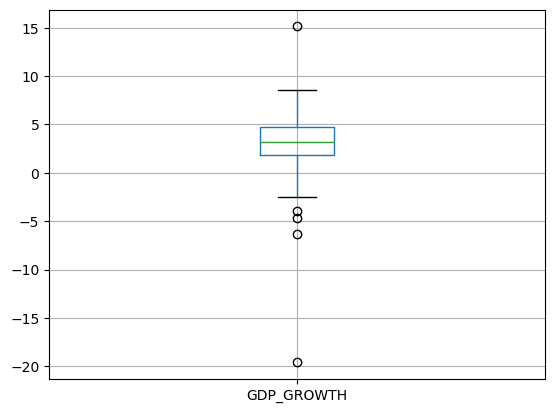

In [19]:
df.boxplot(column=['GDP_GROWTH'])

<Axes: >

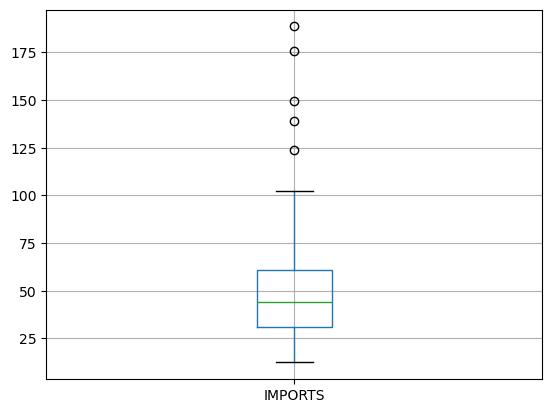

In [20]:
df.boxplot(column=['IMPORTS'])

<Axes: >

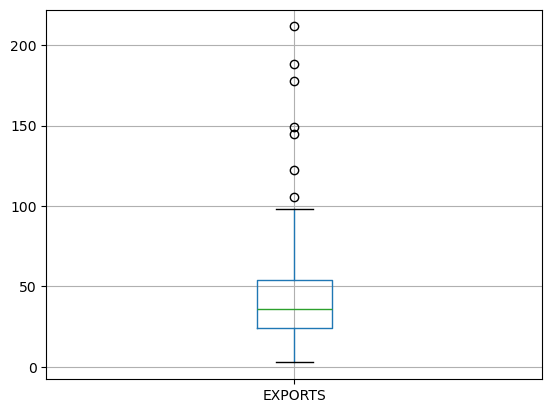

In [21]:
df.boxplot(column=['EXPORTS'])

<Axes: >

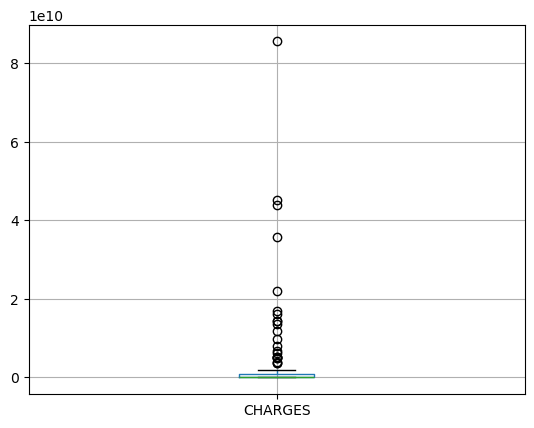

In [22]:
df.boxplot(column=['CHARGES'])

<Axes: >

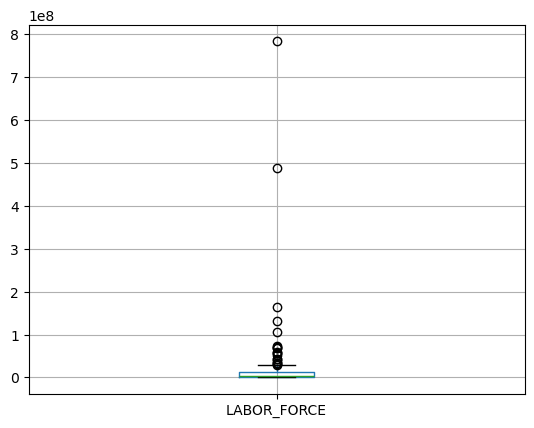

In [23]:
df.boxplot(column=['LABOR_FORCE'])

<Axes: >

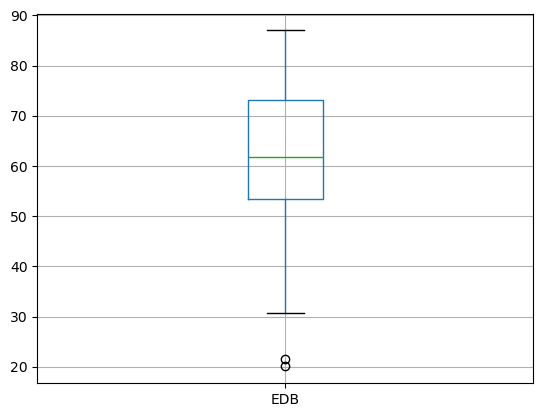

In [24]:
df.boxplot(column=['EDB'])

<Axes: >

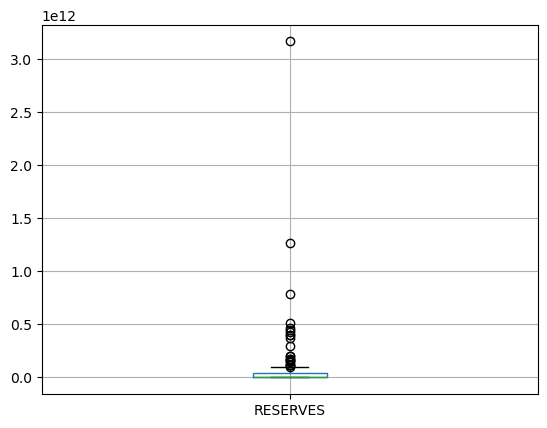

In [25]:
df.boxplot(column=['RESERVES'])

<Axes: >

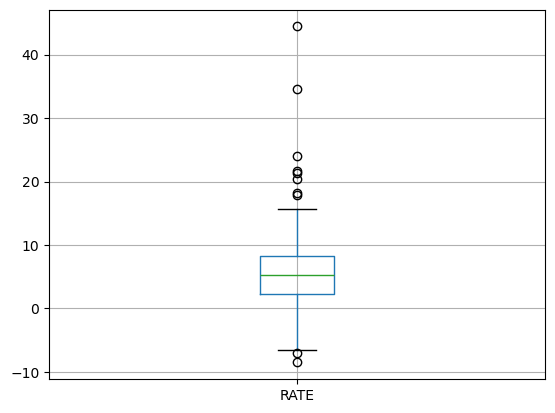

In [26]:
df.boxplot(column=['RATE'])

<Axes: >

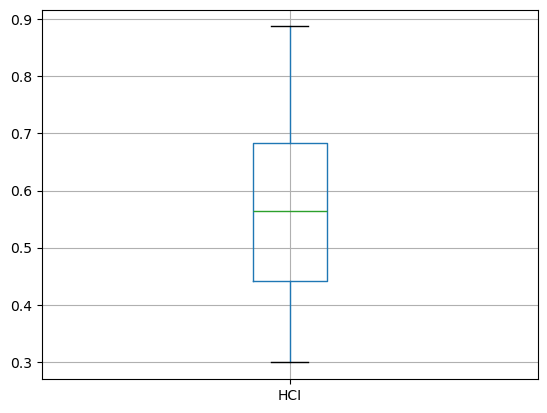

In [27]:
df.boxplot(column=['HCI'])

array([[<Axes: xlabel='FDI', ylabel='FDI'>,
        <Axes: xlabel='GDP_PPP', ylabel='FDI'>,
        <Axes: xlabel='GDP_GROWTH', ylabel='FDI'>,
        <Axes: xlabel='IMPORTS', ylabel='FDI'>,
        <Axes: xlabel='EXPORTS', ylabel='FDI'>,
        <Axes: xlabel='CHARGES', ylabel='FDI'>,
        <Axes: xlabel='LABOR_FORCE', ylabel='FDI'>,
        <Axes: xlabel='EDB', ylabel='FDI'>],
       [<Axes: xlabel='FDI', ylabel='GDP_PPP'>,
        <Axes: xlabel='GDP_PPP', ylabel='GDP_PPP'>,
        <Axes: xlabel='GDP_GROWTH', ylabel='GDP_PPP'>,
        <Axes: xlabel='IMPORTS', ylabel='GDP_PPP'>,
        <Axes: xlabel='EXPORTS', ylabel='GDP_PPP'>,
        <Axes: xlabel='CHARGES', ylabel='GDP_PPP'>,
        <Axes: xlabel='LABOR_FORCE', ylabel='GDP_PPP'>,
        <Axes: xlabel='EDB', ylabel='GDP_PPP'>],
       [<Axes: xlabel='FDI', ylabel='GDP_GROWTH'>,
        <Axes: xlabel='GDP_PPP', ylabel='GDP_GROWTH'>,
        <Axes: xlabel='GDP_GROWTH', ylabel='GDP_GROWTH'>,
        <Axes: xlabel='IMPORTS', yla

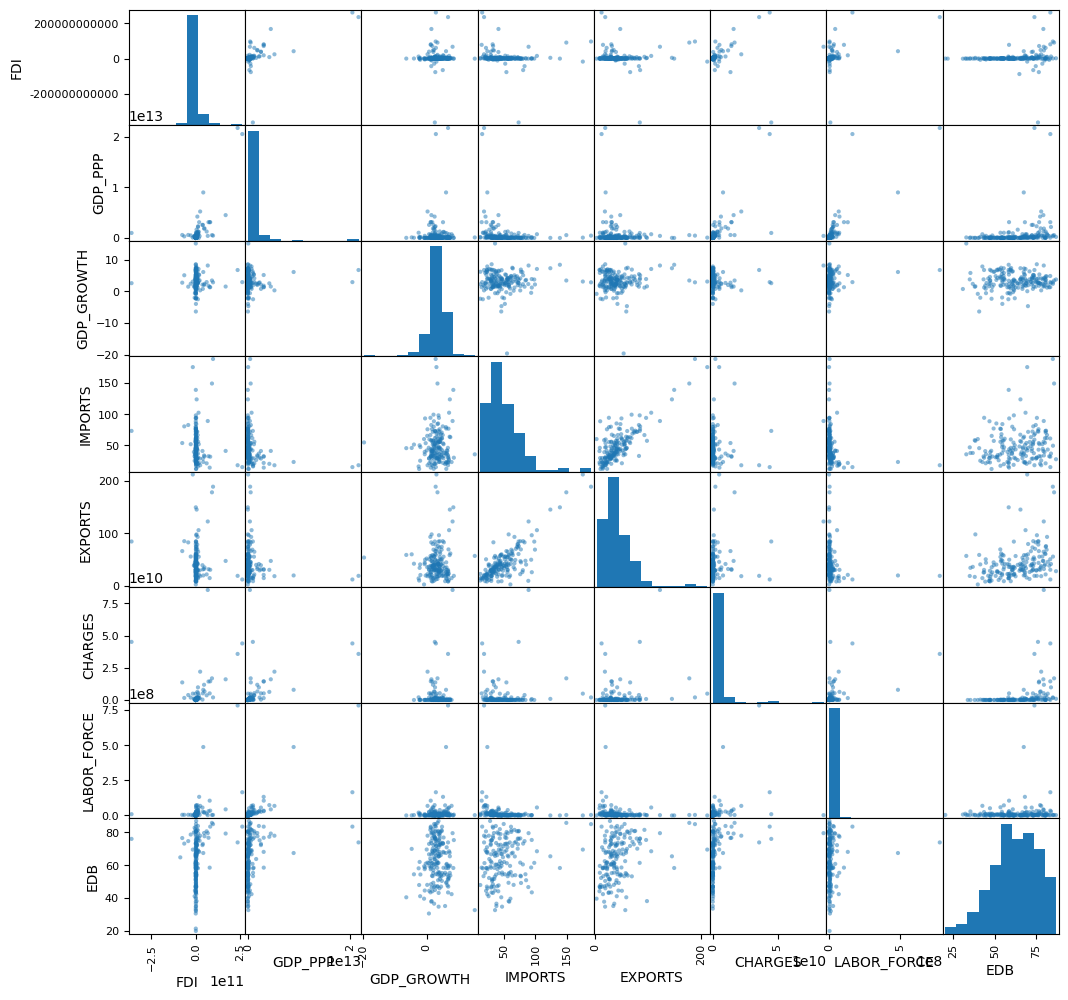

In [28]:
from pandas.plotting import scatter_matrix
#scatter_matrix(df[2:3],figsize=[20,20])
attr=list(df.columns[2:10])
attr
df1=df.loc[:,attr]
df1
pd.plotting.scatter_matrix(df1,figsize=(12,12))

In [29]:
# описательные статистики
df.describe()

,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,RESERVES,RATE,HCI,num_missing
count,2.000000e+02,1.890000e+02,197.000000,176.000000,176.000000,1.530000e+02,1.860000e+02,190.000000,1.720000e+02,110.000000,167.000000,217.000000
mean,5.911103e+09,6.641860e+11,3.140527,49.628199,43.608597,2.763490e+09,1.835155e+07,62.129076,7.233670e+10,6.174123,0.565468,2.170507
std,4.236105e+10,2.362386e+12,3.073618,27.418962,31.293741,9.462673e+09,6.977836e+07,13.822027,2.774065e+11,7.446652,0.146535,2.949177
min,-3.614674e+11,4.656769e+07,-19.607843,12.345638,2.740391,0.000000e+00,3.983300e+04,20.041460,4.368355e+07,-8.520138,0.299029,0.000000
25%,1.072306e+08,2.012045e+10,1.792864,31.092065,24.171182,5.333010e+06,1.052598e+06,53.469163,9.339920e+08,2.294005,0.442008,0.000000
50%,6.367095e+08,8.333764e+10,3.149198,44.206517,36.267632,5.075662e+07,4.112413e+06,61.704655,5.716163e+09,5.206009,0.564260,1.000000
75%,3.044935e+09,3.592990e+11,4.741606,60.898503,53.885885,9.128239e+08,1.245910e+07,73.175267,4.067165e+10,8.332279,0.683645,2.000000
max,2.614820e+11,2.173068e+13,15.132800,188.573085,211.559049,8.548230e+10,7.834241e+08,87.004520,3.168216e+12,44.437544,0.887084,11.000000


In [1]:
#Корреляция между переменными
import matplotlib.pyplot as plt
def plot_corr_matrix(data_basic,attr,fig_no, method):
    correlations=data_basic.corr(method=method)
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    plt.show()

/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/607317453.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+attr)
/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/607317453.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+attr)


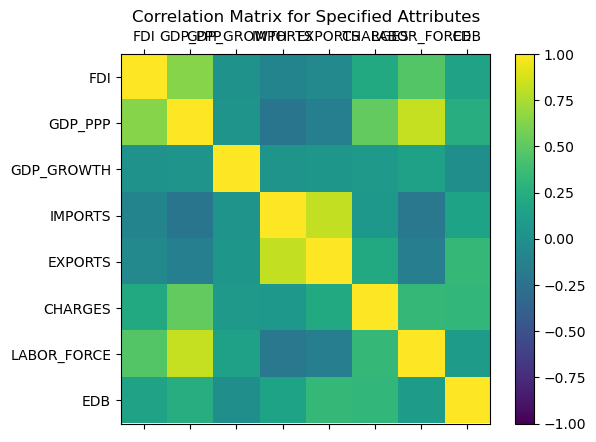

/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/607317453.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+attr)
/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/607317453.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+attr)


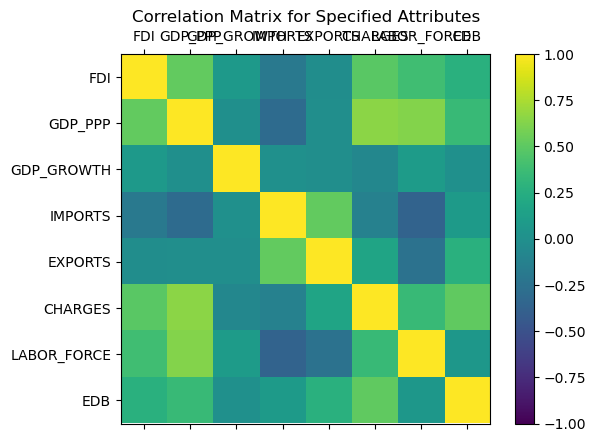

/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/607317453.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+attr)
/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/607317453.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+attr)


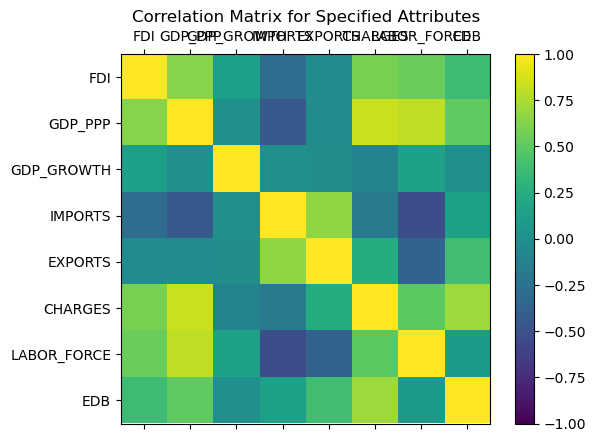

In [31]:
plot_corr_matrix(df1,attr,2, 'pearson')
plot_corr_matrix(df1,attr,2, 'kendall')
plot_corr_matrix(df1,attr,2, 'spearman')

#correlations=df1.corr(method='pearson')
#correlations

In [32]:
import statsmodels.api as sm

In [35]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

feature_names = {'GDP_PPP'}
target_name = {'FDI'}

feature_names_list = list(feature_names)
target_name_list = list(target_name)

df

,Country Name,Country Code,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,...,GDP_GROWTH_ismissing,IMPORTS_ismissing,EXPORTS_ismissing,CHARGES_ismissing,LABOR_FORCE_ismissing,EDB_ismissing,RESERVES_ismissing,RATE_ismissing,HCI_ismissing,num_missing
0,Afghanistan,AFG,1.194351e+08,8.333764e+10,1.840089,40.975606,8.260287,2.402431e+06,1.033409e+07,44.203430,...,False,False,False,False,False,False,False,True,False,1
1,Albania,ALB,1.204383e+09,3.965339e+10,4.071301,45.263667,31.537380,2.641247e+07,1.318022e+06,66.995610,...,False,False,False,False,False,False,False,False,False,0
2,Algeria,DZA,1.466082e+09,4.962001e+11,1.400000,32.341022,25.623547,2.763490e+09,1.217346e+07,48.498030,...,False,False,False,True,False,False,False,False,False,1
3,American Samoa,ASM,5.911103e+09,6.641860e+11,2.184874,99.371069,68.867925,2.763490e+09,1.835155e+07,62.129076,...,False,False,False,True,True,True,True,True,True,8
4,Andorra,AND,5.911103e+09,6.641860e+11,1.588765,49.628199,43.608597,2.763490e+09,1.835155e+07,62.129076,...,False,True,True,True,True,True,True,True,True,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,5.911103e+09,6.641860e+11,3.140527,49.628199,43.608597,2.763490e+09,5.214200e+04,62.129076,...,True,True,True,True,False,True,True,True,True,10
213,West Bank and Gaza,PSE,2.106946e+08,2.647892e+10,0.905278,59.735630,19.865352,1.569027e+06,1.214123e+06,59.666080,...,False,False,False,False,False,False,False,False,False,0
214,"Yemen, Rep.",YEM,-2.820983e+08,6.641860e+11,0.752599,49.628199,43.608597,2.763490e+09,6.545429e+06,30.672890,...,False,True,True,True,False,False,True,True,False,6
215,Zambia,ZMB,4.084385e+08,6.254688e+10,4.034812,35.983050,36.983166,3.500224e+07,7.134980e+06,65.711700,...,False,False,False,False,False,False,False,False,False,0


In [43]:
feature_names=['GDP_PPP', 'GDP_GROWTH', 'IMPORTS', 'EXPORTS', 'CHARGES',
       'LABOR_FORCE', 'EDB', 'RESERVES', 'RATE', 'HCI']

target_name=['FDI']

In [45]:
X = df[feature_names]
y = df[target_name]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FDI   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     15.69
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           8.94e-21
Time:                        08:21:35   Log-Likelihood:                -5547.0
No. Observations:                 217   AIC:                         1.112e+04
Df Residuals:                     206   BIC:                         1.115e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.664e+09   1.34e+10     -0.721      

In [46]:
from sklearn.linear_model import Ridge, Lasso

In [47]:
model = Lasso(alpha=0.1, random_state=241)
model.fit(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+23, tolerance: 3.571e+19
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, random_state=241)

In [48]:
model.coef_

array([ 0.00000000e+00,  1.74407170e-02,  3.04657128e+08,  7.22267717e+07,
        7.33356529e+07, -1.06266394e+00, -1.56979162e+02,  1.08378089e+08,
        2.29676961e-03,  3.73955425e+08, -1.26250173e+10])

In [49]:
y_pred = model.predict(X)
#print(y_pred)

In [50]:
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X.index,y = y_pred.squeeze(),mode='lines',name='y_hat'))
fig.add_trace(go.Scatter(x=X.index,y = y.squeeze(),mode='lines',name='y_fact'))
#fig.update_layout(title=f"MAPE: {mapes[-1]}%")
#figures.append(fig)
fig.show()


In [52]:
model1 = Ridge(alpha=0.1, random_state=241)
model1.fit(X, y)
y_pred = model1.predict(X)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=8.76196e-29): result may not be accurate.



In [53]:
model.coef_

array([ 0.00000000e+00,  1.74407170e-02,  3.04657128e+08,  7.22267717e+07,
        7.33356529e+07, -1.06266394e+00, -1.56979162e+02,  1.08378089e+08,
        2.29676961e-03,  3.73955425e+08, -1.26250173e+10])

In [54]:
#0.001
model1.coef_

array([[ 0.00000000e+00,  1.74349949e-02,  3.05984906e+08,
         7.29239971e+07,  7.19534592e+07, -1.06398704e+00,
        -1.56500679e+02,  1.03338990e+08,  2.21329762e-03,
         3.75068534e+08, -1.17460492e+10]])

In [55]:
#1000
model1.coef_

array([[ 0.00000000e+00,  1.74349949e-02,  3.05984906e+08,
         7.29239971e+07,  7.19534592e+07, -1.06398704e+00,
        -1.56500679e+02,  1.03338990e+08,  2.21329762e-03,
         3.75068534e+08, -1.17460492e+10]])

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X.index,y = y_pred.squeeze(),mode='lines',name='y_hat'))
fig.add_trace(go.Scatter(x=X.index,y = y.squeeze(),mode='lines',name='y_fact'))
#fig.update_layout(title=f"MAPE: {mapes[-1]}%")
#figures.append(fig)
fig.show()

In [57]:
print("Ridge coefs: ", model1.coef_)
print("Lasso coefs: ", model.coef_)

Ridge coefs:  [[ 0.00000000e+00  1.74349949e-02  3.05984906e+08  7.29239971e+07
   7.19534592e+07 -1.06398704e+00 -1.56500679e+02  1.03338990e+08
   2.21329762e-03  3.75068534e+08 -1.17460492e+10]]
Lasso coefs:  [ 0.00000000e+00  1.74407170e-02  3.04657128e+08  7.22267717e+07
  7.33356529e+07 -1.06266394e+00 -1.56979162e+02  1.08378089e+08
  2.29676961e-03  3.73955425e+08 -1.26250173e+10]


In [59]:
import math
def regression_model(name, X, y, alpha):
  if name == 'Ridge':
    model = Ridge(alpha=alpha, random_state=241)
  else:
    model = Lasso(alpha=alpha, random_state=241)
  model.fit(X, y)
  y_pred = model.predict(X)

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=X.index,y = y_pred.squeeze(),mode='lines',name='y_hat'))
  fig.add_trace(go.Scatter(x=X.index,y = y.squeeze(),mode='lines',name='y_fact')) 
  error = 0
  for i in range(len(y_pred)):
    error += (y_pred[i] - y.iloc[i])*(y_pred[i] - y.iloc[i])
  return model, y_pred, fig, math.sqrt(error)/ len(y_pred)


In [60]:
for alpha in [0.1, 1, 10, 100, 1000]:
  model, y_pred, fig, err = regression_model('Ridge', X, y, alpha)
  fig.update_layout(title=f"ERR: {err}")
  fig.show()
  print(err)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=8.76196e-29): result may not be accurate.

/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/4145203827.py:16: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=8.76196e-28): result may not be accurate.



2074864570.3216934


/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/4145203827.py:16: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=8.76196e-27): result may not be accurate.



2075058959.7942698


/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/4145203827.py:16: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=8.76196e-26): result may not be accurate.



2075707242.799895


/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/4145203827.py:16: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=8.76196e-25): result may not be accurate.



2075924104.4439552


/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_6340/4145203827.py:16: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



2076160287.1554759
